LEAST SQUARE ESTIMATION METHOD (Simple linear regression model)

---
Annie Bhalla

---






## Importing Modules

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Importing Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
print(data.keys())

Index(['YearsExperience', 'Salary'], dtype='object')


### Splitting into train and test datasets

In [ ]:
x= data['YearsExperience']
y= data['Salary']

In [ ]:
x=x.values
y=y.values

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3)

### Implementing OLS from scratch

In [ ]:
class OLS:
  def __init__(self, beta0=0, beta1=0):
    self.beta0 = beta0
    self.beta1= beta1

  def train(self, x,y):
    #calculating mean for x and y 
    x_mean = np.mean(x);
    y_mean = np.mean(y);

    numerator=0;
    denominator=0;
  #calculating 
    for i in range(len(x)):
      numerator += (x[i]- x_mean)*(y[i]- y_mean);
      denominator += (x[i]- x_mean)**2;

    self.beta1= numerator/ denominator;
    self.beta0= y_mean - (self.beta1*x_mean);
    print("Beta1" ,self.beta1)
    print("Beta0", self.beta0)


  def predict(self, x, y):
    # y_pred=[]
    # for i in range(len(x)): 
    y_pred= (self.beta1 * x) + self.beta0
    return y_pred

  def error(self, y,y_pred):
    error= (y-y_pred)*(y-y_pred)
    return error;
   

In [ ]:
#Fitting into OLS
ols= OLS();
ols.train(x_train, y_train)

Beta1 9494.03529411765
Beta0 25088.785882352924


In [ ]:
#Finding predicted values
y_predicted=ols.predict(x_test, y_test)

In [ ]:
y_predicted

array([116231.52470588,  82052.99764706,  89648.22588235,  64014.33058824,
       115282.12117647,  60216.71647059,  52621.48823529,  55469.69882353,
        55469.69882353])

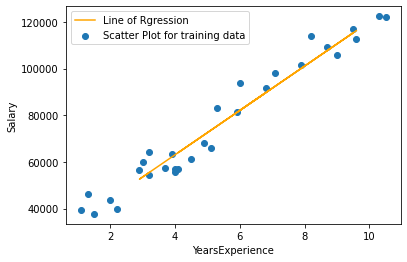

In [ ]:
# Plotting best fit line 
plt.scatter(x, y, label="Scatter Plot for training data")
plt.plot(x_test, y_predicted, label="Line of Regression", color='orange')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()


In [ ]:
#Calculating error
error=ols.error(y_test, y_predicted)
error

array([1.29349900e+07, 1.41300825e+08, 4.36715586e+06, 4.80710730e+07,
       2.84556017e+06, 9.16706703e+06, 1.61645149e+07, 1.05000768e+06,
       8.05560312e+07])

In [ ]:
#Calculating Residual Sum Squares
rss= error.sum()
rss

316457224.73637646

In [ ]:
# Residual Sum Error
rse= np.sqrt(rss/ (len(x)-2))
rse

3361.8512371288643